In [106]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime
import json
import pandas as pd

In [107]:
import json
# Your data
with open('trades.json', 'r') as f:
    data = json.load(f)

In [108]:
df = pd.DataFrame(data)
df.head()

,symbol,price,volume,timestamp_unix,conditions
0,BINANCE:BTCUSDT,37377.80,0.00696,1700124840215,None
1,BINANCE:BTCUSDT,37369.44,0.00020,1700124841092,None
2,BINANCE:BTCUSDT,37377.81,0.26934,1700124840266,None
3,BINANCE:BTCUSDT,37377.80,0.00136,1700124840288,None
4,BINANCE:BTCUSDT,37377.80,0.00121,1700124840289,None


In [109]:
# convert unix milliseconds timestamp to datetime
df['datetime'] = pd.to_datetime(df['timestamp_unix'], unit='ms')

df.drop(['timestamp_unix'], axis=1, inplace=True)
df.drop(['conditions'], axis=1, inplace=True)
df.head()

,symbol,price,volume,datetime
0,BINANCE:BTCUSDT,37377.80,0.00696,2023-11-16 08:54:00.215
1,BINANCE:BTCUSDT,37369.44,0.00020,2023-11-16 08:54:01.092
2,BINANCE:BTCUSDT,37377.81,0.26934,2023-11-16 08:54:00.266
3,BINANCE:BTCUSDT,37377.80,0.00136,2023-11-16 08:54:00.288
4,BINANCE:BTCUSDT,37377.80,0.00121,2023-11-16 08:54:00.289


In [110]:
# Assuming df is your dataframe
# Convert 'datetime' column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])
df.head()

,symbol,price,volume,datetime
0,BINANCE:BTCUSDT,37377.80,0.00696,2023-11-16 08:54:00.215
1,BINANCE:BTCUSDT,37369.44,0.00020,2023-11-16 08:54:01.092
2,BINANCE:BTCUSDT,37377.81,0.26934,2023-11-16 08:54:00.266
3,BINANCE:BTCUSDT,37377.80,0.00136,2023-11-16 08:54:00.288
4,BINANCE:BTCUSDT,37377.80,0.00121,2023-11-16 08:54:00.289


In [111]:
# Group by date and symbol, and aggregate OHLC values
ohlc_df = df.groupby(['symbol', pd.Grouper(key='datetime', freq='1T')]).agg({
    'price': ['first', 'max', 'min', 'last'],
    'volume': 'sum'
}).reset_index()
ohlc_df.head()

symbol            datetime     price                      \
                                           first       max       min   
0  BINANCE:BTCUSDT 2023-11-16 08:54:00  37377.80  37377.81  37363.04   
1  BINANCE:BTCUSDT 2023-11-16 08:55:00  37366.64  37376.09  37353.83   
2  BINANCE:BTCUSDT 2023-11-16 08:56:00  37353.83  37353.84  37343.69   
3  BINANCE:BTCUSDT 2023-11-16 08:57:00  37343.88  37343.88  37323.52   
4  BINANCE:BTCUSDT 2023-11-16 08:58:00  37323.53  37323.53  37299.40   

               volume  
       last       sum  
0  37366.64  17.09878  
1  37353.84  16.30350  
2  37343.87   5.98893  
3  37323.53  29.14503  
4  37302.01  28.97059

In [112]:
# Rename columns for better readability
ohlc_df.columns = ['symbol', 'datetime', 'open', 'high', 'low', 'close', 'volume']

# Display the resulting OHLC dataframe
ohlc_df.head()

,symbol,datetime,open,high,low,close,volume
0,BINANCE:BTCUSDT,2023-11-16 08:54:00,37377.80,37377.81,37363.04,37366.64,17.09878
1,BINANCE:BTCUSDT,2023-11-16 08:55:00,37366.64,37376.09,37353.83,37353.84,16.30350
2,BINANCE:BTCUSDT,2023-11-16 08:56:00,37353.83,37353.84,37343.69,37343.87,5.98893
3,BINANCE:BTCUSDT,2023-11-16 08:57:00,37343.88,37343.88,37323.52,37323.53,29.14503
4,BINANCE:BTCUSDT,2023-11-16 08:58:00,37323.53,37323.53,37299.40,37302.01,28.97059


In [116]:
import mplfinance as mpf

# https://pypi.org/project/mplfinance/

#  mpf.plot(data)
# where data is a Pandas DataFrame object containing :
# Open, High, Low and Close data, with a Pandas DatetimeIndex.

In [117]:
# make datetime column to a datetimeIndex:
ohlc_df = ohlc_df.set_index('datetime')
ohlc_df.head()

,symbol,open,high,low,close,volume
datetime,,,,,,
2023-11-16 08:54:00,BINANCE:BTCUSDT,37377.80,37377.81,37363.04,37366.64,17.09878
2023-11-16 08:55:00,BINANCE:BTCUSDT,37366.64,37376.09,37353.83,37353.84,16.30350
2023-11-16 08:56:00,BINANCE:BTCUSDT,37353.83,37353.84,37343.69,37343.87,5.98893
2023-11-16 08:57:00,BINANCE:BTCUSDT,37343.88,37343.88,37323.52,37323.53,29.14503
2023-11-16 08:58:00,BINANCE:BTCUSDT,37323.53,37323.53,37299.40,37302.01,28.97059


In [118]:
# rename columns for mplfinance
ohlc_df.rename(columns={'open': 'Open'}, inplace=True)
ohlc_df.rename(columns={'high': 'High'}, inplace=True)
ohlc_df.rename(columns={'low': 'Low'}, inplace=True)
ohlc_df.rename(columns={'close': 'Close'}, inplace=True)
ohlc_df.rename(columns={'volume': 'Volume'}, inplace=True)
ohlc_df.head()

,symbol,Open,High,Low,Close,Volume
datetime,,,,,,
2023-11-16 08:54:00,BINANCE:BTCUSDT,37377.80,37377.81,37363.04,37366.64,17.09878
2023-11-16 08:55:00,BINANCE:BTCUSDT,37366.64,37376.09,37353.83,37353.84,16.30350
2023-11-16 08:56:00,BINANCE:BTCUSDT,37353.83,37353.84,37343.69,37343.87,5.98893
2023-11-16 08:57:00,BINANCE:BTCUSDT,37343.88,37343.88,37323.52,37323.53,29.14503
2023-11-16 08:58:00,BINANCE:BTCUSDT,37323.53,37323.53,37299.40,37302.01,28.97059


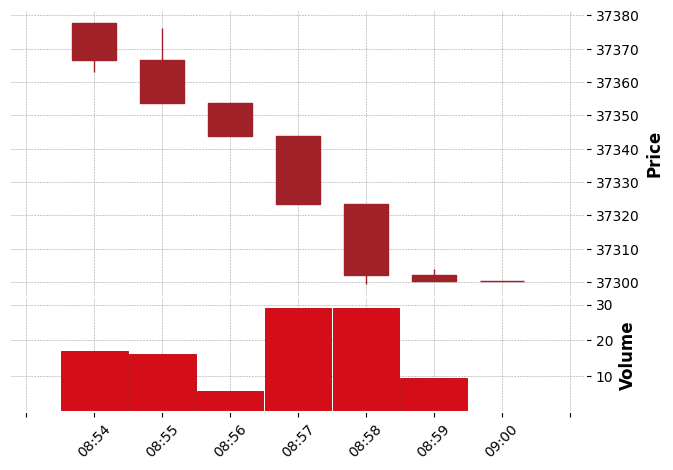

In [123]:
mpf.plot(ohlc_df, type='candle', style='charles', volume=True)